# Plotting With Seaborn
In this lecture we will focus on the basic of plotting in Seaborn and see how Seaborn makes plotting even easier and fast in Python.

We can think of Seaborn as a library that uses Matplotlib and is a collection of preset graphs that are easier to use and prettier in color

One of the main advantages of Seabon (in my opinion) is the ability to quickly compare and plot data when we have different groups. If you have three sets of data you want to compare in Excel, MATLAB, Matplotlib, etc you would have to graph each set of data by itself. In Seaborn, it is as easy as specifying the x and y data you want to compare and how you want the grouping to be separated and you can plot it all in one line of code.

Therefore, if we do our data aggregation and processing with Seaborn's ability in mind, we become much more efficient data analysts.

## Checklist:

    1) Scatter Plots
    2) Distribution Plots
    3) Categorical Plots
    4) Heat maps and Correlation
    5) 3D Plots
___

# 0) Getting Started With Seaborn

### Pip Install Seaborn

In [3]:
# pip install seaborn

### Configrue Vscode

In [4]:
% matplotlib inline
% config Inlinebackend.print_figure_kwargs={'facecolor':'w'}

UsageError: Line magic function `%` not found.


### Import seaborn

In [5]:
import seaborn as sns

### Import data from seaborn
* Seaborn already has a varitety of data we can work with
* We can use `.get_dataset_names()` to see what is available

In [6]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

Now we can import the data set we want by using `.load_dataset()`

In [7]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Using Hue in Seaborn
One of the biggest advantages of seaborn is its ability to separate data into groups and plot them in different colors.

If you recall the groupby function from working with DataFrames, its a similar concept. When plotting, we can easily pick the category we want to use as the separator, and apply a hue on it. Then the plot will automatically plot each grouping within the category we choose as different colors/individual plots

For example, in our sample data set, a good category we might choose is the species. There are plenty of relationships we can build with the sepal and petal data, but its important to compare between species and see if the trends are different between each species.

We will see its usage more as we see the other plots we can make with seaborn

# 1) Scatter Plots

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

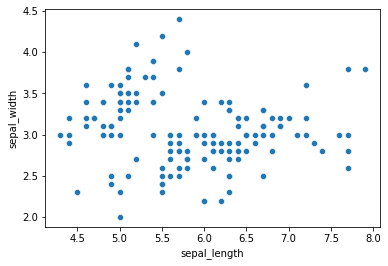

In [8]:
sns.scatterplot(x="sepal_length", y="sepal_width", data=data)

We can plot this again but apply hue so we can see the scatterplot based on the species.
* We will see there isn't a strong correlation at first when plotting all species as the same color (almost looks negative correlation)
* We can now see that there is a general positive correlation between sepal length and sepal width

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

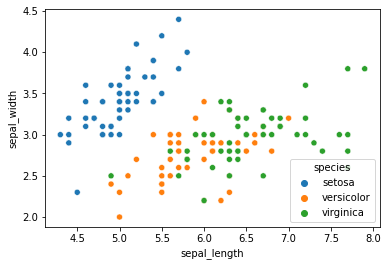

In [9]:
sns.scatterplot(x="sepal_length", y="sepal_width", data=data, hue="species")

## We can change titles/axes similar to in matplotlib
We have to store the plot as a variable, and make changes by applying methods on them

[Text(0.5, 1.0, 'Sepal Width vs Sepal Length'),
 Text(0.5, 0, 'Sepal Length'),
 Text(0, 0.5, 'Sepal Width')]

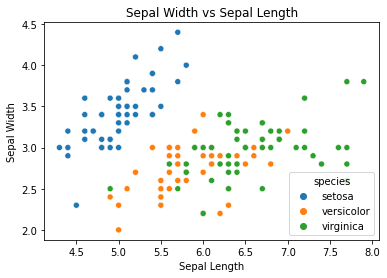

In [10]:
g = sns.scatterplot(x="sepal_length", y="sepal_width", data=data, hue="species")

g.set(title="Sepal Width vs Sepal Length", xlabel="Sepal Length", ylabel="Sepal Width")

# 2) Distribution Plots
* Histograms
* Kernel Density Plots
* Joint Plots
* Pair Plots

## .displot()
* We can easily evaluate the distribution between different groups of data

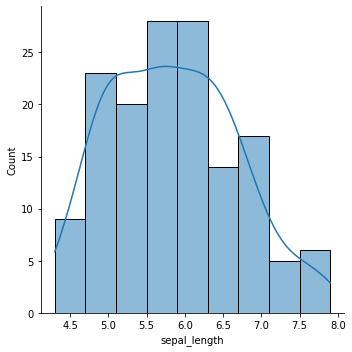

In [11]:
# General population
sns.displot( x="sepal_length", data=data, kde=True)

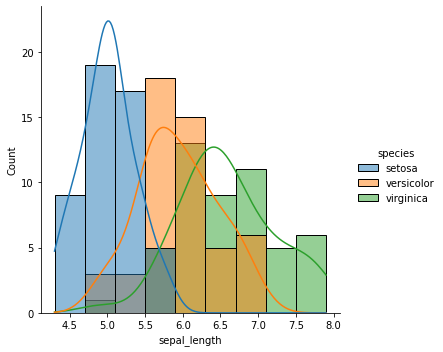

In [12]:
# Distribution based on species
sns.displot( x="sepal_length", data=data, kde=True, hue="species")

## .joinplot()
* We can see both the scatter and the distribution of each variable

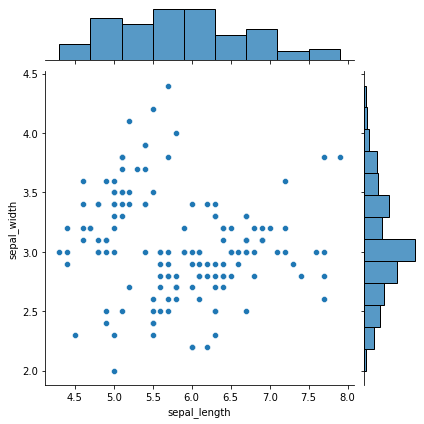

In [13]:
sns.jointplot(x='sepal_length', y='sepal_width', data=data, kind='scatter')

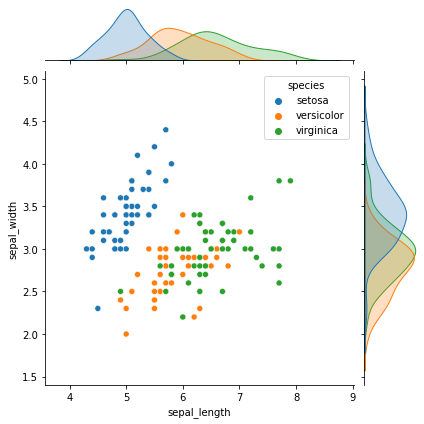

In [14]:
sns.jointplot(x='sepal_length', y='sepal_width', data=data, kind='scatter', hue="species")

## .pairplot()
* We can easily compare all variables against each other and see if there is a coorelation

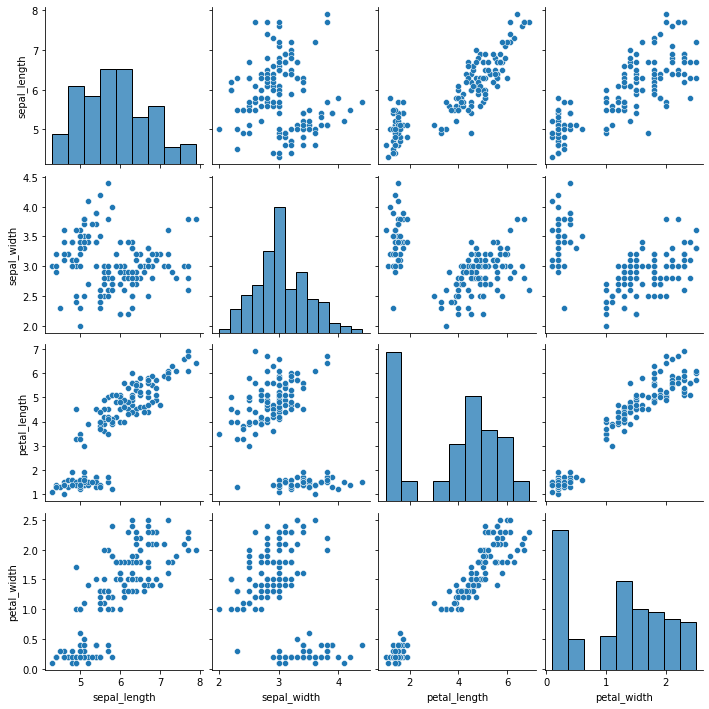

In [15]:
sns.pairplot(data)

We can add hue to separate the difference based on species
* Notice now its much easier to see trends we couldn't see before?
    * Sertosa generally has lower petal length
    * There is a general correlation between petal_length and pedal_width

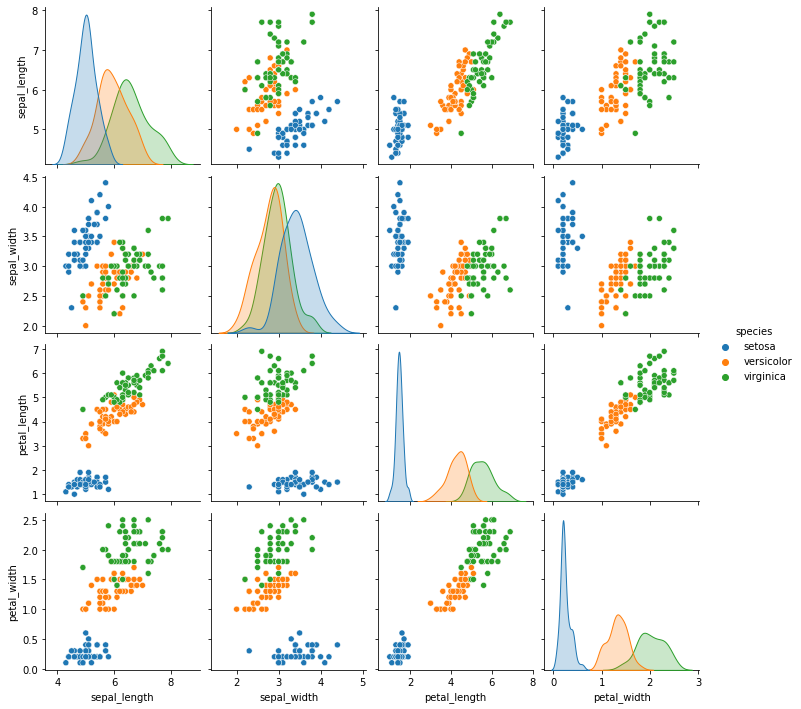

In [16]:
sns.pairplot(data, hue="species")

Pair plots plot each variable against each other variable, therefore, the top right corner plots are the same as the bottom left corner. Therefore, it gives repeated information, which we can remove.

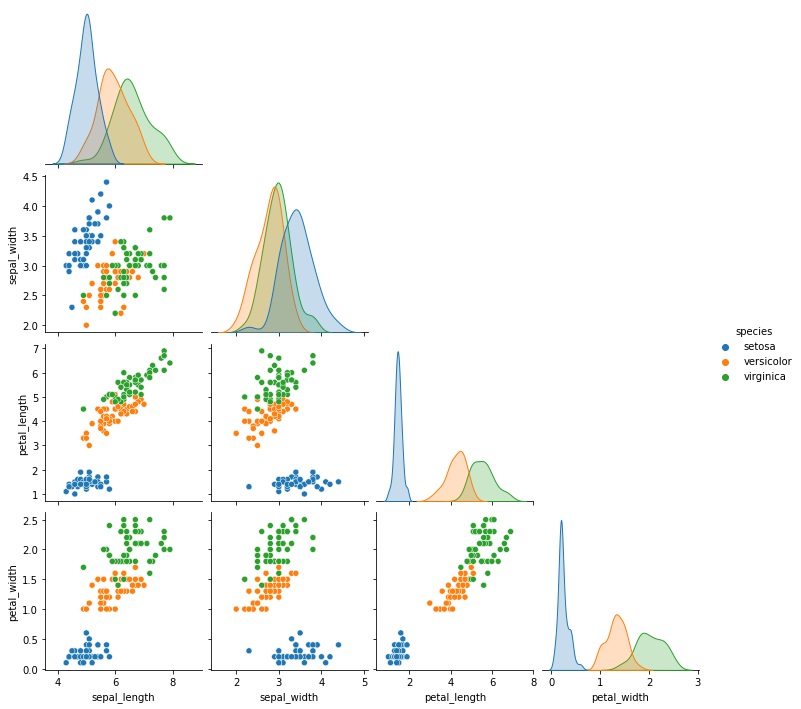

In [17]:
sns.pairplot(data, hue="species", corner=True)

# 3) Categorical Plots
* Bar Graphs
* Boxplots

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

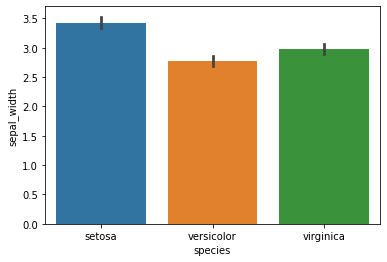

In [18]:
sns.barplot(x='species', y='sepal_width', data=data)

If we had an uneven number of data points for each group, we can see how many entries we have and see if we need to take that into account
* For the iris dataset, each species has 50 so not much observations we can make

<AxesSubplot:xlabel='species', ylabel='count'>

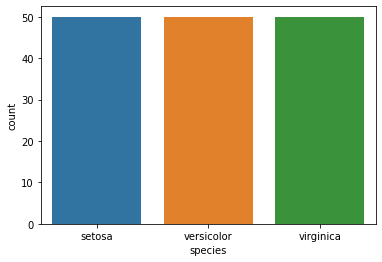

In [19]:
sns.countplot(x='species', data=data)

## Boxplots

### We can do boxplots on each column of data we have

<AxesSubplot:>

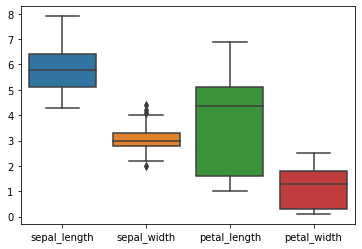

In [20]:
sns.boxplot(data=data)

### We can do boxplots based on species

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

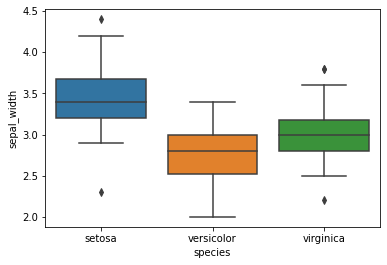

In [21]:
sns.boxplot(x="species", y="sepal_width", data=data)

### We can change the color palette 
Go to this website on more information on the different color palettes available
* https://seaborn.pydata.org/tutorial/color_palettes.html

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

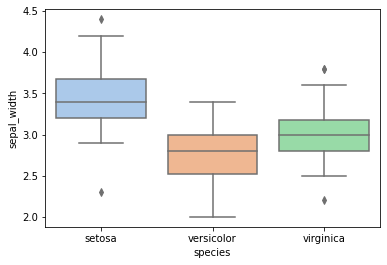

In [22]:
sns.boxplot(x="species", y="sepal_width", data=data, palette='pastel')

## We can change orientation of plot by switching x and y parameters

<AxesSubplot:xlabel='sepal_length', ylabel='species'>

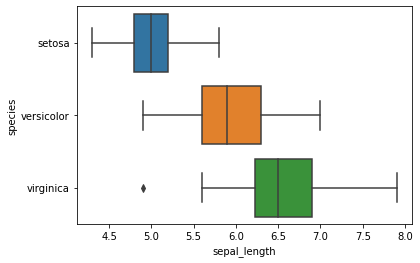

In [23]:
sns.boxplot(y="species", x="sepal_length", data=data)

## Strip Plots
Strip plots are like like boxplots but shows the individual dots instead

<AxesSubplot:>

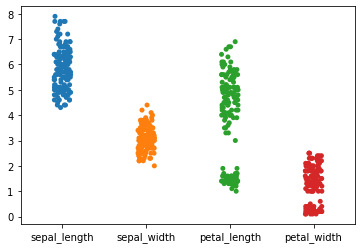

In [24]:
sns.stripplot(data=data)

## Combining strip and box plots

<AxesSubplot:xlabel='sepal_length', ylabel='species'>

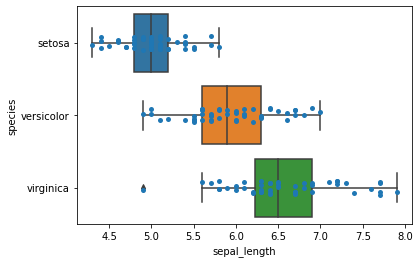

In [25]:
sns.boxplot(y="species", x="sepal_length", data=data)
sns.stripplot(y="species", x="sepal_length", data=data)

# 5) 3D and Contour Plots
Examples taken from
* https://pythonnumericalmethods.berkeley.edu/notebooks/chapter12.02-3D-Plotting.html

In [26]:
import matplotlib.pyplot as plt
import numpy as np

### Scatter

Text(0.5, 0, 'z')

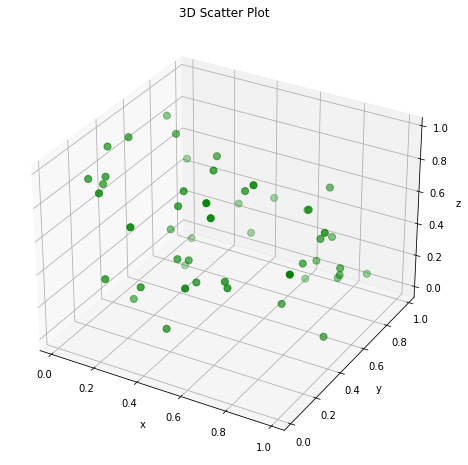

In [27]:
x = np.random.random(50)
y = np.random.random(50)
z = np.random.random(50)

fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(x, y, z, c = 'g', s = 50)
ax.set_title('3D Scatter Plot')

# Set axes label
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

## Line

Text(0.5, 0, 't')

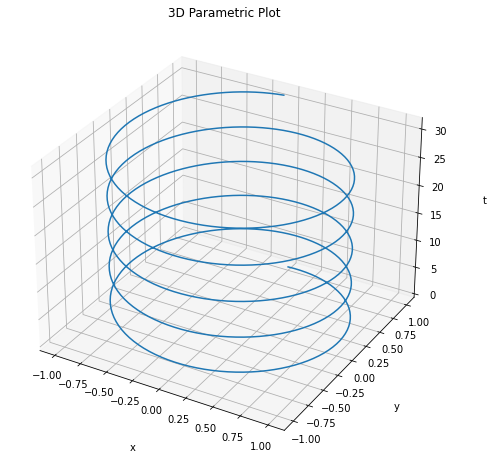

In [28]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
t = np.arange(0, 10*np.pi, np.pi/50)
x = np.sin(t)
y = np.cos(t)

ax.plot3D(x, y, t)
ax.set_title('3D Parametric Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('t', labelpad=20)

## Surface

Text(0.5, 0, 'z')

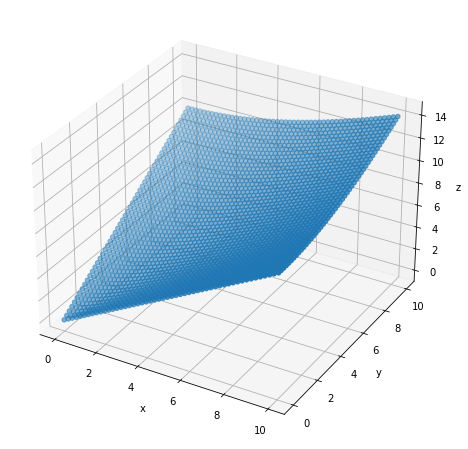

In [29]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection = '3d')

# Generate normally distributed data
x = np.linspace(0,10,51)
y = np.linspace(0,10,51)

# Create mesh grid based on x and y values
xx, yy = np.meshgrid(x, y)

zz = np.sqrt(xx**2 + yy**2)

ax.scatter3D(xx, yy, zz)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

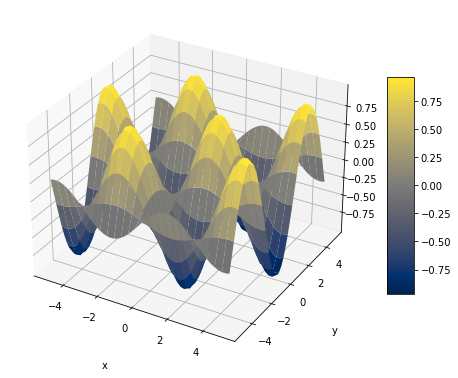

In [30]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')

x = np.arange(-5, 5.1, 0.2)
y = np.arange(-5, 5.1, 0.2)

X, Y = np.meshgrid(x, y)
Z = np.sin(X)*np.cos(Y)

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

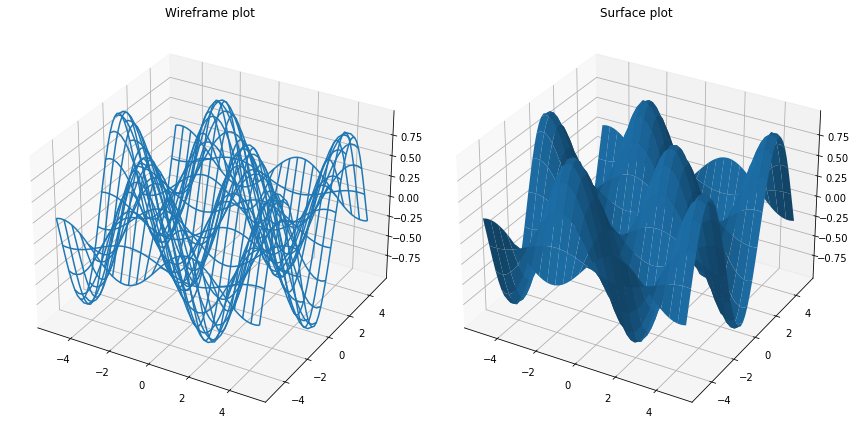

In [31]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_wireframe(X,Y,Z)
ax.set_title('Wireframe plot')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X,Y,Z)
ax.set_title('Surface plot')

plt.tight_layout()

plt.show()

## Contour

Text(0, 0.5, 'y (cm)')

<Figure size 576x576 with 0 Axes>

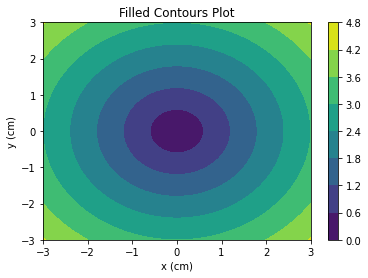

In [39]:
fig = plt.figure(figsize=(8,8))

xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X**2 + Y**2)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')

# 7) Plotting Data From Lec 3 (Seaborn)
In Lec 4 (Matplotlib), we showed how we were able to plot the agitation and mixing data from Lec 3 (Importing and Manipulating Data). We plot the same data again, but this time with Seaborn, to showcase how its even easier to plot with hue.

In [33]:
import pandas as pd
df2 = pd.read_excel('../Sample-Data/Sample-Data.xlsx', sheet_name="Agitation_and_Mixing")
mixing_data_avg = df2.groupby(['Impeller','Speed (RPM)']).mean()
mixing_data_avg.reset_index(inplace=True)
mixing_data_avg

,Impeller,Speed (RPM),Avg Volts (V),Avg Torque (Nm),Avg Force (N)
0,Pitch,250,4.075000,0.510121,0.091822
1,Pitch,275,4.091000,0.615466,0.110784
2,Pitch,300,4.107333,0.722291,0.130012
3,Pitch,350,4.127000,0.850863,0.153156
4,Pitch,375,4.135000,0.904965,0.162894
5,Turbine,250,4.142667,0.953419,0.171615
6,Turbine,275,4.162000,1.082027,0.194764
7,Turbine,300,4.189000,1.262217,0.227199
8,Turbine,350,4.222667,1.483127,0.266962
9,Turbine,375,4.244667,1.629170,0.293251


After getting the data, we can plot everything using one line of code. Then one additional line for labeling the graph

[Text(0.5, 1.0, 'RPM vs Force'),
 Text(0.5, 0, 'Rotations Per Minute (RPM)'),
 Text(0, 0.5, 'Force (N)')]

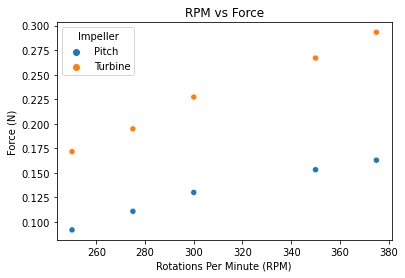

In [36]:
g = sns.scatterplot(data=mixing_data_avg, x="Speed (RPM)", y="Avg Force (N)", hue="Impeller")
g.set(title="RPM vs Force",xlabel="Rotations Per Minute (RPM)", ylabel="Force (N)")